# Clustering for scRNA-seq analysis 
NOMS
https://github.com/mousepixels/sanbomics_scripts/blob/main/single_cell_analysis_complete_class.ipynb <-- AQUÍ HI HA TOTA LA INFO I STEPS

Load packages


In [1]:
#!pip install scanpy
#!pip install ipywidgets

import scanpy as sc
import numpy as np
import matplotlib.pyplot as plt

Load data set + define some settings

In [2]:
adata = sc.datasets.paul15()
print(adata)
# Global Variable for reproducibility
SEED = 1

AnnData object with n_obs × n_vars = 2730 × 3451
    obs: 'paul15_clusters'
    uns: 'iroot'


### 1. Exploratory Data Analysis: compare gene distributions

Dataset shape: (2730, 3451)
Cells (n_obs): 2730
Genes (n_vars): 3451
obs columns: ['paul15_clusters', 'n_genes_by_counts', 'total_counts']
               n_cells_by_counts  mean_counts  pct_dropout_by_counts  \
0610007L01Rik                935     0.490842              65.750916   
0610009O20Rik                598     0.283516              78.095238   
0610010K14Rik               1842     1.513553              32.527473   
0910001L09Rik               1092     0.621978              60.000000   
1100001G20Rik                115     0.067766              95.787546   

               total_counts  
0610007L01Rik        1340.0  
0610009O20Rik         774.0  
0610010K14Rik        4132.0  
0910001L09Rik        1698.0  
1100001G20Rik         185.0  


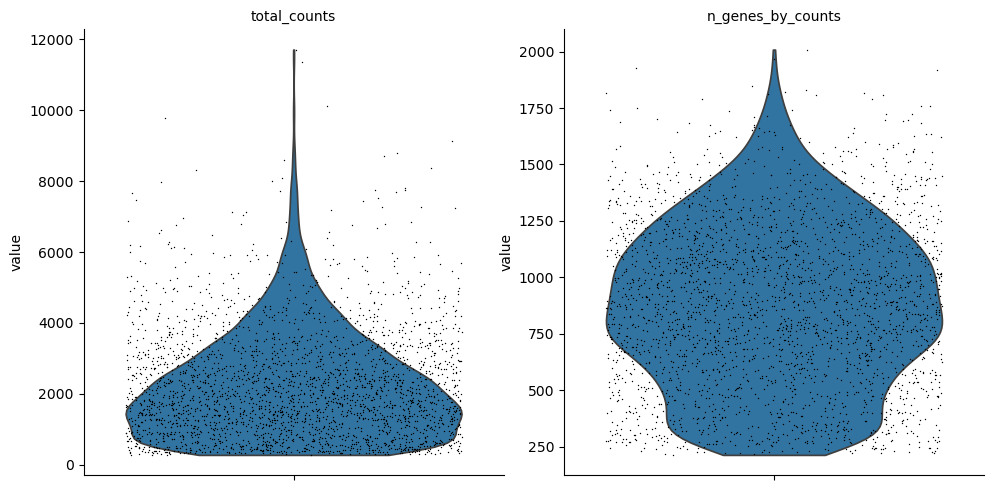

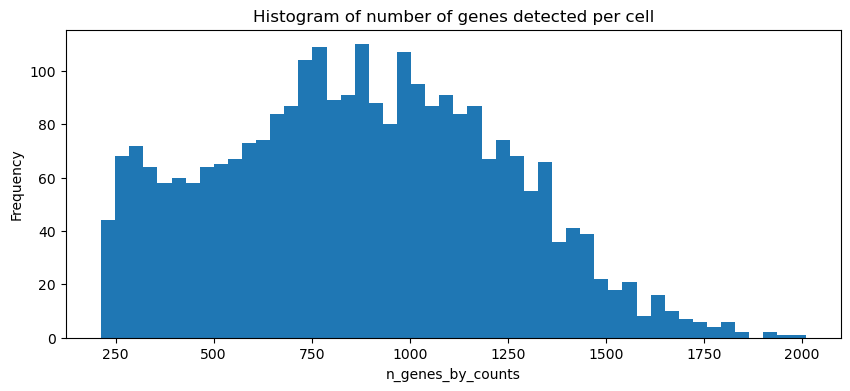

In [5]:
#Display basic information
print("Dataset shape:", adata.X.shape)
print(f"Cells (n_obs): {adata.n_obs}")
print(f"Genes (n_vars): {adata.n_vars}")
print('obs columns:', adata.obs.columns.tolist())

# compute QC metrics
sc.pp.calculate_qc_metrics(adata, percent_top=None, log1p=False, inplace=True)
print(adata.var.head())

#plot QC violin
sc.pl.violin(adata, ['total_counts', 'n_genes_by_counts'], jitter=0.4, multi_panel=True)

# Histogram of gene detection
plt.figure(figsize=(10,4))
plt.hist(adata.obs['n_genes_by_counts'], bins=50)
plt.title('Histogram of number of genes detected per cell')
plt.xlabel('n_genes_by_counts')
plt.ylabel('Frequency')
plt.show()

### 2. Preprocessing: normalization, log1p, choose 10% most highly variable genes

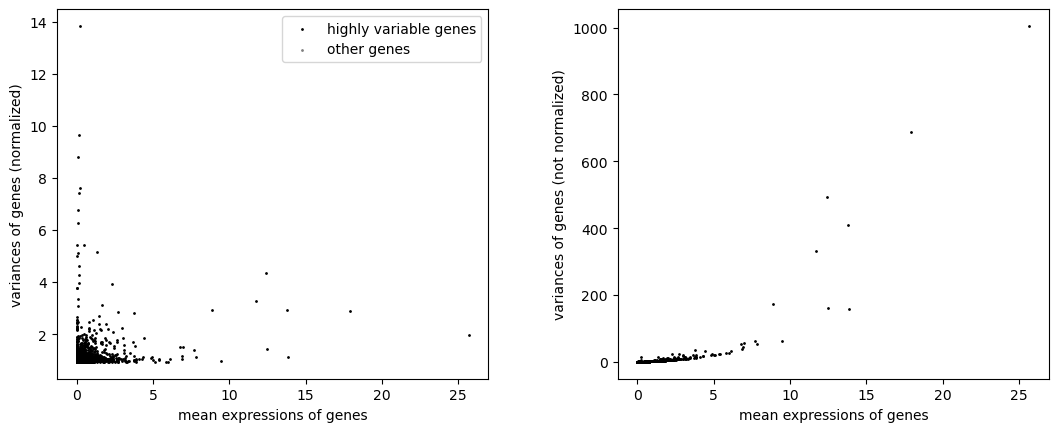

In [6]:
# 1. Filter lowly-expressed genes
sc.pp.filter_genes(adata, min_cells=10)

# 2. highly variable genes selection on raw counts
sc.pp.highly_variable_genes(adata, flavor='seurat_v3')
adata_hvg = adata[:, adata.var['highly_variable']].copy()

# 3. Now normalize and log-transform
sc.pp.normalize_total(adata_hvg, target_sum=1e4)
sc.pp.log1p(adata_hvg)

adata_hvg.raw = adata_hvg

# Plot highly variable genes
sc.pl.highly_variable_genes(adata_hvg)


### 3. Dimensionality reduction: less than 50 dimensions with PCA

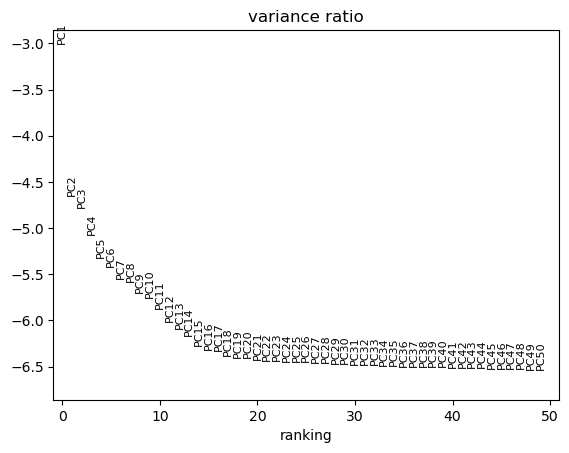

In [7]:
#Variance ratio in a plot
sc.pp.regress_out(adata_hvg, ['total_counts', 'n_genes_by_counts'])
sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver='arpack')
sc.pl.pca_variance_ratio(adata_hvg, log=True, n_pcs = 50)

### 4. Clustering: Use two kinds of methods and comment on the differences
- k-Means or Gaussian Mixture Models
- Community-based methods Louvain/Leiden on kNN graphs

### 5. Internal validation: Silhouette score and stability

### 6. External validation: ARI and NMI compared to labels in [Paul et. al. 2015]

### 7. Biomarkers: Find marker genes for each cluster

### 8. Visualization: UMAP, t-SNE, marker dot or matrix plots, etc. (scanpy plots)